In [1]:
from mtdScope import scopeEmulator
import matplotlib.pyplot as plt
import numpy as np
import time
        
#load the sample data to test
se = scopeEmulator()
#se.loadData('./data/HV160_high_300mV_def.hd5')
#se.loadData('./data/HV160_high_300mV_def.hd5')
se.loadData('./data/LaserTest_HV160_low/HV160_high_200mV_def.hd5')
se.sliceEvent()


processing the 0th events...
processing the 100th events...
processing the 200th events...
processing the 300th events...
processing the 400th events...
processing the 500th events...
processing the 600th events...
processing the 700th events...
processing the 800th events...
processing the 900th events...
processing the 1000th events...
processing the 1100th events...
processing the 1200th events...
processing the 1300th events...
processing the 1400th events...
processing the 1500th events...
processing the 1600th events...
processing the 1700th events...
processing the 1800th events...
processing the 1900th events...
processing the 2000th events...
processing the 2100th events...
processing the 2200th events...
processing the 2300th events...
processing the 2400th events...
processing the 2500th events...
processing the 2600th events...
processing the 2700th events...
processing the 2800th events...
processing the 2900th events...
processing the 3000th events...
processing the 3100t

(array([  1.,   0.,   3.,  12.,  17.,  52., 109., 228., 395., 566., 762.,
        786., 715., 552., 425., 221., 102.,  38.,  13.,   3.]),
 array([42271.23046875, 42279.03417969, 42286.83789062, 42294.64160156,
        42302.4453125 , 42310.24902344, 42318.05273438, 42325.85644531,
        42333.66015625, 42341.46386719, 42349.26757812, 42357.07128906,
        42364.875     , 42372.67871094, 42380.48242188, 42388.28613281,
        42396.08984375, 42403.89355469, 42411.69726562, 42419.50097656,
        42427.3046875 ]),
 <a list of 20 Patch objects>)

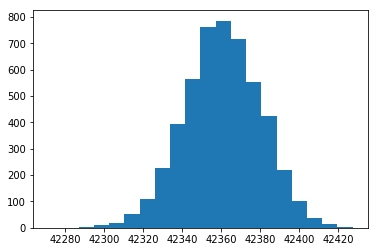

In [3]:
ts = se.runTimeWalk(r0=0, r1= se.nevent, nstep = 100, method = 'newton')
dts = np.subtract(ts[1], ts[0])
print('trigger time jitter = '+str(ts[0].std()))
print('preAmp time jitter = '+str(ts[1].std()))
print('Walk corrected time jitter = '+str(dts.std()))
plt.hist(dts, 20)


In [4]:
print('min: '+str(np.argmin(dts)))
print('max: '+str(np.argmax(dts)))
ts[1][202]

min: 2749
max: 3455


63152.805

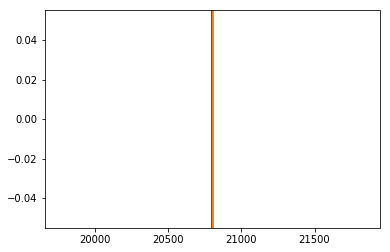

In [5]:

contral={}
contral['zoomRange'] = 500
contral['check_signalCFT'] = True
contral['check_getCFTiming'] = True
se.debug_cft(202, 1, 'linear', contral)

processing the 0th events...
processing the 100th events...
processing the 200th events...
processing the 300th events...
processing the 400th events...
processing the 500th events...
processing the 600th events...
processing the 700th events...
processing the 800th events...
processing the 900th events...
processing the 1000th events...
processing the 1100th events...
processing the 1200th events...
processing the 1300th events...
processing the 1400th events...
processing the 1500th events...
processing the 1600th events...
processing the 1700th events...
processing the 1800th events...
processing the 1900th events...
processing the 2000th events...
processing the 2100th events...
processing the 2200th events...
processing the 2300th events...
processing the 2400th events...
processing the 2500th events...
processing the 2600th events...
processing the 2700th events...
processing the 2800th events...
processing the 2900th events...
processing the 3000th events...
processing the 3100t

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 5000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.]),
 array([-0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 ,
        -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ,  0.45,  0.5 ]),
 <a list of 20 Patch objects>)

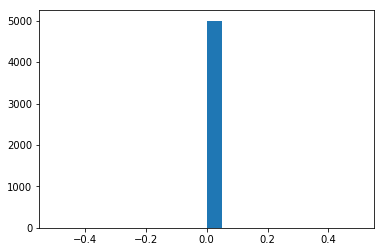

In [6]:
ts = se.runTimeWalk_peak2peak_filtered(r0=0, r1= se.nevent, nstep = 100, method = 'newton', peak=200, pkrage=20)
dts = np.subtract(ts[1], ts[0])
print('trigger time jitter = '+str(ts[0].std()))
print('preAmp time jitter = '+str(ts[1].std()))
print('Walk corrected time jitter = '+str(dts.std()))
plt.hist(dts, 20)